In [1]:
pwd%

'C:\\Users\\admin'

In [4]:
%cd "C:\Users\admin\Desktop\Supriya\Preps\Gradient_Decent"

C:\Users\admin\Desktop\Supriya\Preps\Gradient_Decent


In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 3A04-4F4D

 Directory of C:\Users\admin\Desktop\Supriya\Preps\Gradient_Decent

01/22/2024  06:49 PM    <DIR>          .
01/21/2024  01:05 PM    <DIR>          ..
01/21/2024  01:04 PM            18,693 ttc-subway-delay-codes.xlsx
01/21/2024  12:43 PM           889,437 ttc-subway-delay-data-2021.xlsx
01/21/2024  12:43 PM         1,087,107 ttc-subway-delay-data-2022.xlsx
01/21/2024  01:05 PM         1,443,612 ttc-subway-delay-data-2023.xlsx
01/21/2024  01:05 PM            10,183 ttc-subway-delay-data-readme.xlsx
               5 File(s)      3,449,032 bytes
               2 Dir(s)  16,101,441,536 bytes free


In [8]:
import pandas as pd

In [25]:
tcc_delay_2021=pd.read_excel(r"ttc-subway-delay-data-2021.xlsx")
tcc_delay_2022=pd.read_excel(r"ttc-subway-delay-data-2022.xlsx")
tcc_delay_2023=pd.read_excel(r"ttc-subway-delay-data-2023.xlsx")

In [20]:
# Read all sheets into a dictionary of DataFrames
all_sheets = pd.read_excel(r"ttc-subway-delay-data-2021.xlsx", sheet_name=None)

# Merge all DataFrames into one
merged_tcc_delay_2021 = pd.concat(all_sheets.values(), axis=0)

# Reset the index if needed
merged_tcc_delay_2021.reset_index(drop=True, inplace=True)

# Print the merged DataFrame
print(merged_tcc_delay_2021)

            Date   Time     Day                Station   Code  Min Delay  \
0     2021-01-01  00:33  Friday          BLOOR STATION  MUPAA          0   
1     2021-01-01  00:39  Friday     SHERBOURNE STATION   EUCO          5   
2     2021-01-01  01:07  Friday     KENNEDY BD STATION   EUCD          5   
3     2021-01-01  01:41  Friday       ST CLAIR STATION   MUIS          0   
4     2021-01-01  02:04  Friday  SHEPPARD WEST STATION   MUIS          0   
...          ...    ...     ...                    ...    ...        ...   
16365 2021-12-31  01:10  Friday         MUSEUM STATION   SUUT          0   
16366 2021-12-31  01:12  Friday          FINCH STATION   SUDP          5   
16367 2021-12-31  01:21  Friday  EGLINTON WEST STATION  PUOPO          3   
16368 2021-12-31  01:37  Friday  SHEPPARD WEST STATION   SUDP          0   
16369 2021-12-31  07:00  Friday      DON MILLS STATION   TUSC          0   

       Min Gap Bound Line  Vehicle  
0            0     N   YU     6046  
1            

In [21]:
# Check the size of the merged DataFrame
print("Number of rows:", merged_tcc_delay_2021.shape[0])
print("Number of columns:", merged_tcc_delay_2021.shape[1])

Number of rows: 16370
Number of columns: 10


In [145]:
merged_tcc_delay_2021.info()
tcc_delay_2022.info()
tcc_delay_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16370 entries, 0 to 16369
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       16370 non-null  datetime64[ns]
 1   Time       16370 non-null  object        
 2   Day        16370 non-null  object        
 3   Station    16370 non-null  object        
 4   Code       16370 non-null  object        
 5   Min Delay  16370 non-null  int64         
 6   Min Gap    16370 non-null  int64         
 7   Bound      12119 non-null  object        
 8   Line       16318 non-null  object        
 9   Vehicle    16370 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19895 entries, 0 to 19894
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       19895 non-null  datetime64[ns]
 1   Tim

In [36]:
tcc_delay_3year = pd.concat([merged_tcc_delay_2021, tcc_delay_2022, tcc_delay_2023], axis=0)
tcc_delay_3year.reset_index(drop=True, inplace=True)

In [38]:
# Check the size of the merged DataFrame
print("Number of rows:", tcc_delay_3year.shape[0])
print("Number of columns:", tcc_delay_3year.shape[1])

Number of rows: 59214
Number of columns: 10


In [39]:
# Check for missing values in the DataFrame
missing_values = tcc_delay_3year.isnull().sum()
print("Missing Values:\n", missing_values)
missing_percentage = (tcc_delay_3year.isnull().mean() * 100).round(2)
print("Missing Percentage:\n", missing_percentage)

Missing Values:
 Date             0
Time             0
Day              0
Station          0
Code             0
Min Delay        0
Min Gap          0
Bound        18323
Line           139
Vehicle          0
dtype: int64
Missing Percentage:
 Date          0.00
Time          0.00
Day           0.00
Station       0.00
Code          0.00
Min Delay     0.00
Min Gap       0.00
Bound        30.94
Line          0.23
Vehicle       0.00
dtype: float64


As columns Bound is having 30 % missing values we are going to drop that column 

In [ ]:
tcc_delay_3year = tcc_delay_3year.drop('Bound', axis=1)
tcc_delay_3year.columns

Aslo we will drop the observations where the line info is missing

In [ ]:
tcc_delay_3year = tcc_delay_3year.dropna()
# Check the size of the merged DataFrame
print("Number of rows:", tcc_delay_3year.shape[0])
print("Number of columns:", tcc_delay_3year.shape[1])

Upon reviewing the Line column of data, I found some inconsistant data. The same lines had different names, some of which had extra spaces or special characters. As a result, I created a DF with the old name and the updated line name, which I then mapped to the dataframe.


In [72]:
line_mapping_df=pd.read_csv(r"unique_lines.csv")
tcc_delay_3year = pd.merge(tcc_delay_3year, line_mapping_df, on='Line', how='left')

#### ***Since I'm analysing data from the last three years, let's look at- 
1. The distribution of delays by year.
2. The ditribution of average delay by year

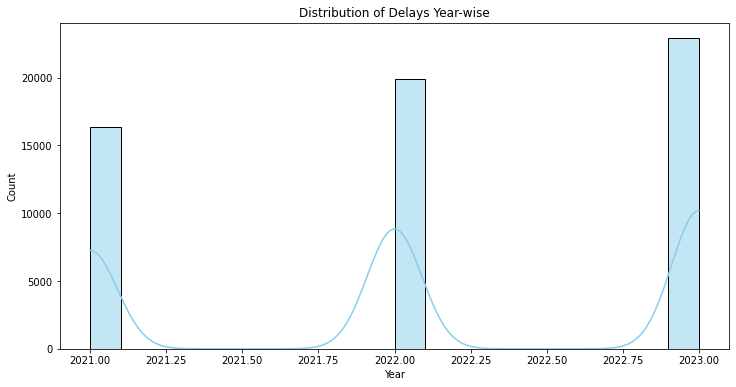

In [146]:
# Extract year from the 'Date' column
tcc_delay_3year['Year'] = tcc_delay_3year['Date'].dt.year

# Plot the distribution of delays year-wise
plt.figure(figsize=(12, 6))
sns.histplot(data=tcc_delay_3year, x='Year', kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Delays Year-wise')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

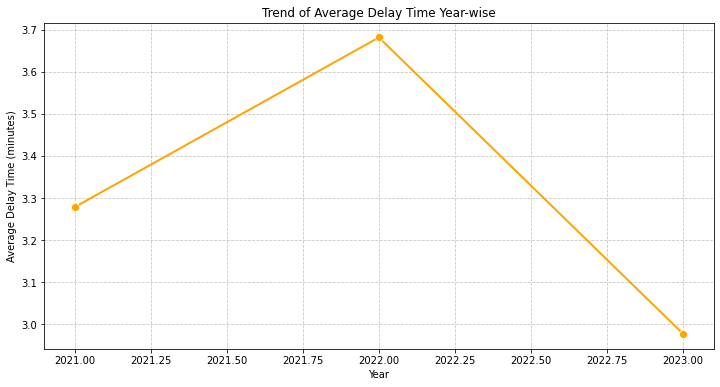

In [147]:
# Group by Year and calculate the average delay time
avg_delay_time_yearly = tcc_delay_3year.groupby('Year')['Min Delay'].mean().reset_index(name='Avg Delay Time')

# Plot the trend of average delay time year-wise using a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_delay_time_yearly, x='Year', y='Avg Delay Time', marker='o', color='orange', markersize=8, linewidth=2)
plt.title('Trend of Average Delay Time Year-wise')
plt.xlabel('Year')
plt.ylabel('Average Delay Time (minutes)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### The graph shows that while the average delay appears to have decreased in 2023, the number of days has been rising from 2021 to 2023.

#### ***Let's examine the delay and its average duration over months for different lines

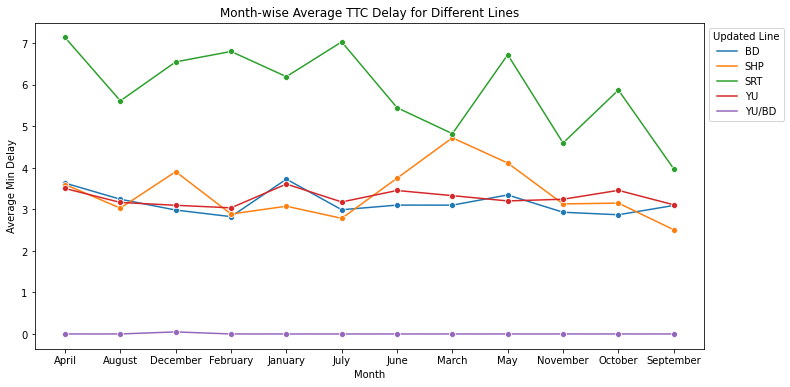

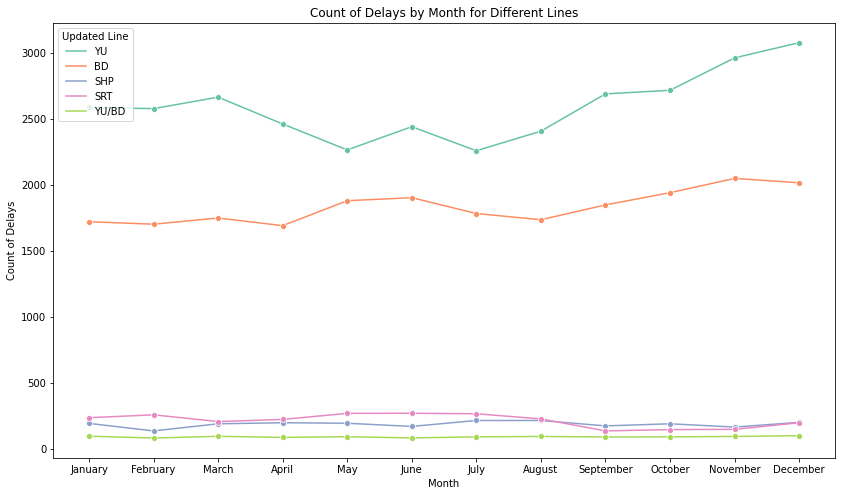

In [148]:
# Extract month from the 'Date' column
tcc_delay_3year['Month'] = tcc_delay_3year['Date'].dt.month_name()

# Group by month, Updated_Line, and calculate the average delay
monthly_average_delay = tcc_delay_3year.groupby(['Month', 'Updated_Line'])['Min Delay'].mean().reset_index()

# Plot the month-wise average delay for different Updated_Lines using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Min Delay', hue='Updated_Line', data=monthly_average_delay, marker='o')
plt.title('Month-wise Average TTC Delay for Different Lines')
plt.xlabel('Month')
plt.ylabel('Average Min Delay')
plt.legend(title='Updated Line', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# Create a line plot for count of delays by month for different lines
plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Min Delay', hue='Updated_Line', data=tcc_delay_3year, estimator='count', ci=None, marker='o',palette='Set2')
plt.title('Count of Delays by Month for Different Lines')
plt.xlabel('Month')
plt.ylabel('Count of Delays')
plt.legend(title='Updated Line', loc='upper left')
plt.show()

### SRT is a line with a high monthly average delay time. The YU line has the most number of delays annually. The most delays in a year occur in December.

#### ***Let's analyse the likelihood of delays by day and week.

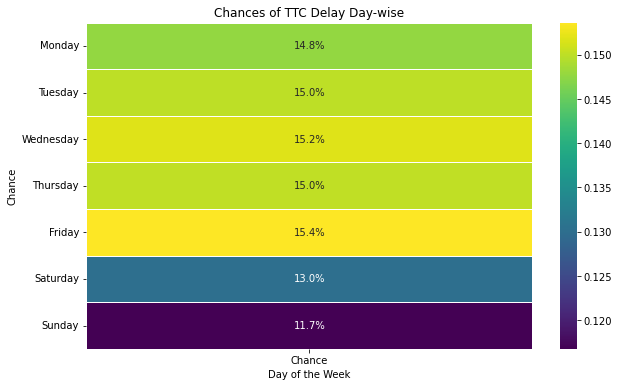

In [85]:
# Calculate the total number of records and the number of records with delays for each day of the week
total_records = len(tcc_delay_3year)
daywise_delays = tcc_delay_3year.groupby('Day').size().reset_index(name='Delays')

# Calculate the chances of delay day-wise
daywise_delays['Chance'] = daywise_delays['Delays'] / total_records

# Create a pivot table for the heatmap
heatmap_data = daywise_delays.pivot_table(index='Day', values='Chance', aggfunc='mean').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot heatmap of chances of TTC delay day-wise
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1%", linewidths=.5)
plt.title('Chances of TTC Delay Day-wise')
plt.xlabel('Day of the Week')
plt.ylabel('Chance')
plt.show()

### The graph indicates that weekdays have the highest likelihood of subway delays, with Friday having the highest possibility.

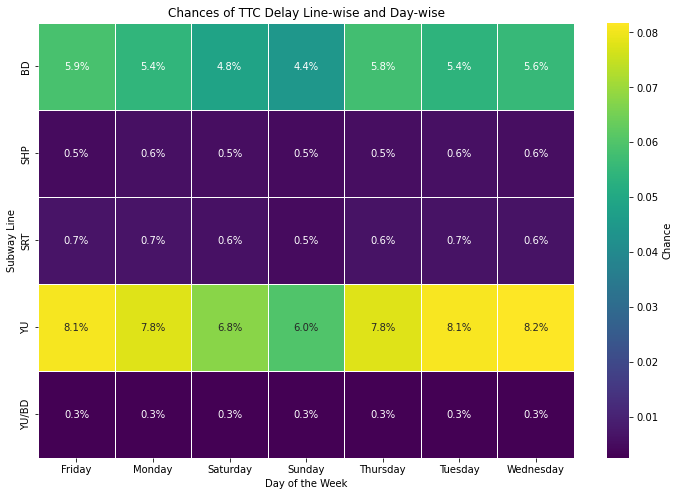

In [90]:
# Calculate the total number of records and the number of records with delays for each day of the week and line
total_records = len(tcc_delay_3year)
line_daywise_delays = tcc_delay_3year.groupby(['Updated_Line', 'Day']).size().reset_index(name='Delays')

# Calculate the chances of delay line-wise and day-wise
line_daywise_delays['Chance'] = line_daywise_delays['Delays'] / total_records

# Create a pivot table for the heatmap
heatmap_data = line_daywise_delays.pivot_table(index='Updated_Line', columns='Day', values='Chance', aggfunc='mean')

# Plot heatmap of chances of TTC delay line-wise and day-wise
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1%", linewidths=.5, cbar_kws={'label': 'Chance'})
plt.title('Chances of TTC Delay Line-wise and Day-wise')
plt.xlabel('Day of the Week')
plt.ylabel('Subway Line')
plt.show()

### If we perform the same analysis line-by-line, we find that YU has a high percentage of delays across all lines, with 8.2% on Wednesday and 8.1% on Friday & Tuesday.

#### ***Let's examine the delay and the typical delay duration on an hourly basis. Line by line

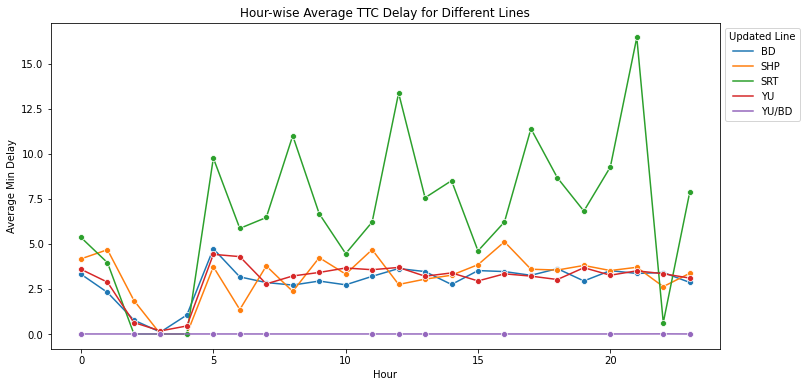

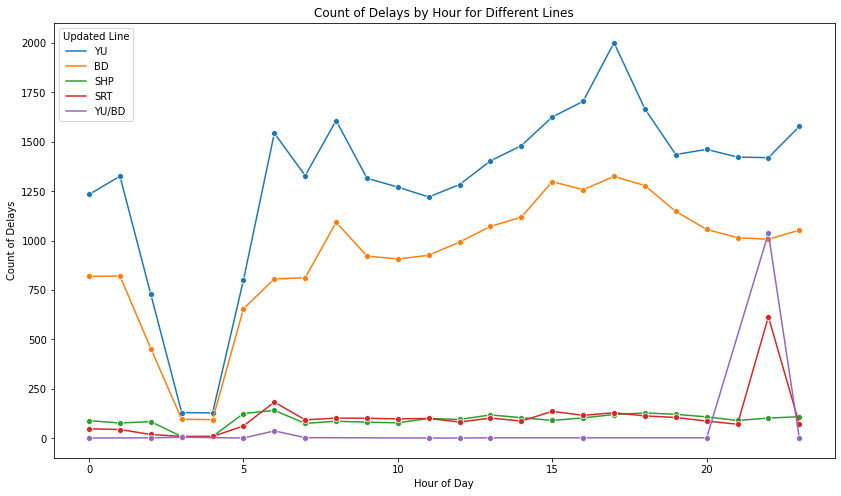

In [136]:
# Extract month from the 'Date' column
tcc_delay_3year['Hour'] = tcc_delay_3year['Time'].dt.hour

# Group by month, Updated_Line, and calculate the average delay
monthly_average_delay = tcc_delay_3year.groupby(['Hour', 'Updated_Line'])['Min Delay'].mean().reset_index()

# Plot the month-wise average delay for different Updated_Lines using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Min Delay', hue='Updated_Line', data=monthly_average_delay, marker='o')
plt.title('Hour-wise Average TTC Delay for Different Lines')
plt.xlabel('Hour')
plt.ylabel('Average Min Delay')
plt.legend(title='Updated Line', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


# Create a line plot for count of delays by hour for different lines
plt.figure(figsize=(14, 8))
sns.lineplot(x='Hour', y='Min Delay', hue='Updated_Line', data=tcc_delay_3year, estimator='count', ci=None, marker='o')
plt.title('Count of Delays by Hour for Different Lines')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Delays')
plt.legend(title='Updated Line', loc='upper left')
plt.show()

### There may be fewer subways running during hours three and four, as evidenced by the minimum number of delays in those hours as well as the minimum average delay for the entire day. YU and BD appear to have the most delays in the 16th hour, whereas YU/BD and SRT have the most delays in the 22nd hour. 

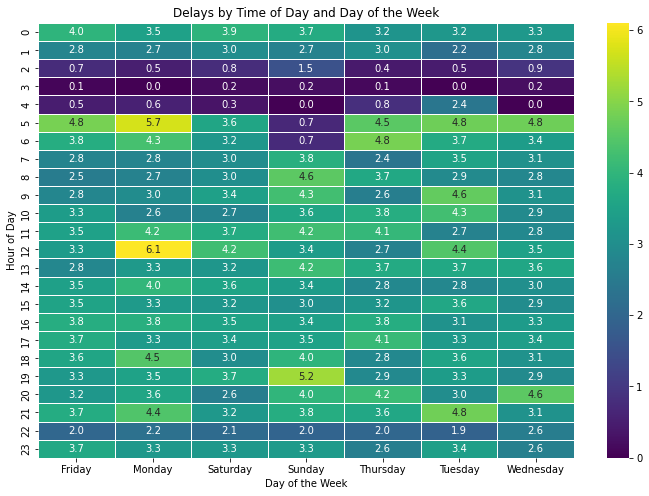

In [67]:
# Convert 'Time' column to datetime format
tcc_delay_3year['Time'] = pd.to_datetime(tcc_delay_3year['Time'])

# Extract hour and day of the week from the 'Time' column
tcc_delay_3year['Hour'] = tcc_delay_3year['Time'].dt.hour

# Create a pivot table for heatmap
heatmap_data = tcc_delay_3year.pivot_table(index='Hour', columns='Day', values='Min Delay', aggfunc='mean')

# Heatmap for delays by time of day and day of the week
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.title('Delays by Time of Day and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of Day')
plt.show()


#### ***Let's look at the causes of the subway's delay and What are the ten most important reasons?

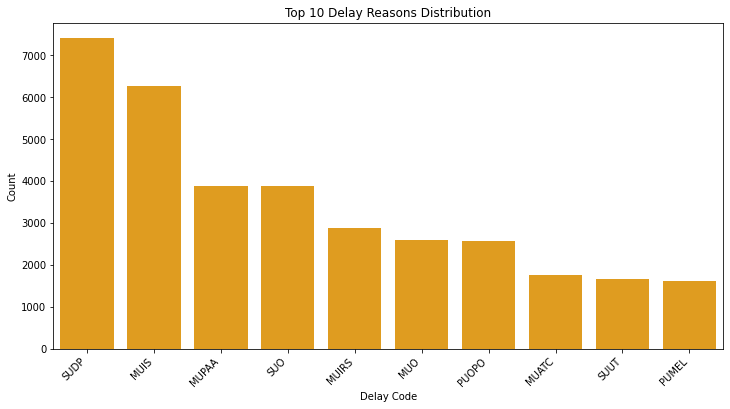

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Explore Unique Codes
unique_codes = tcc_delay_3year['Code'].unique()


# 2. Count Occurrences
delay_reason_counts = tcc_delay_3year['Code'].value_counts()

# 3. Visualization (Plot only top 10)
top_10_delay_reasons = delay_reason_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_delay_reasons.index, y=top_10_delay_reasons.values, color='orange')
plt.title('Top 10 Delay Reasons Distribution')
plt.xlabel('Delay Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


### Top reasons are "Disorderly Patron", "Injured or ill Customer (In Station) - Transported". It will be essential to address these top 10 causes of delays if TTC train services are to become more dependable and efficient, giving both locals and visitors to Toronto a smoother commute.

#### ***Examining the causes of the subway line delays, one by one 

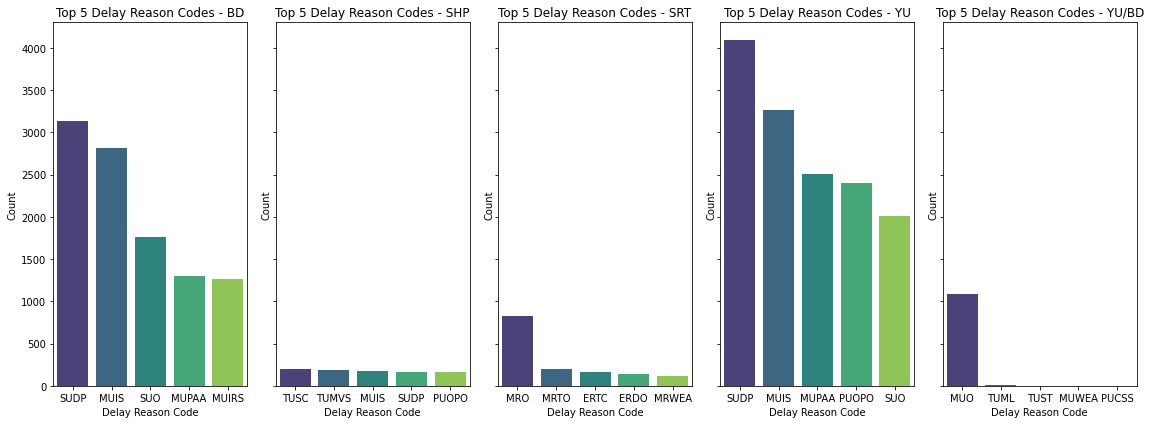

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'top_5_codes_per_line' with columns 'Updated_Line', 'Code', and 'Count'
# Replace 'top_5_codes_per_line' with the actual name of your DataFrame

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(top_5_codes_per_line['Updated_Line'].unique()), figsize=(16, 6), sharey=True)

# Plot bar plots for each Updated_Line
for i, line in enumerate(top_5_codes_per_line['Updated_Line'].unique()):
    line_data = top_5_codes_per_line[top_5_codes_per_line['Updated_Line'] == line]
    sns.barplot(x='Code', y='Count', data=line_data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Top 5 Delay Reason Codes - {line}')
    axes[i].set_xlabel('Delay Reason Code')
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


### "Disorderly Patron" i.e SUDP for YU and BD line is the primary cause of the delay.

#### ***Analyze delays on a per-station basis for deeper insights

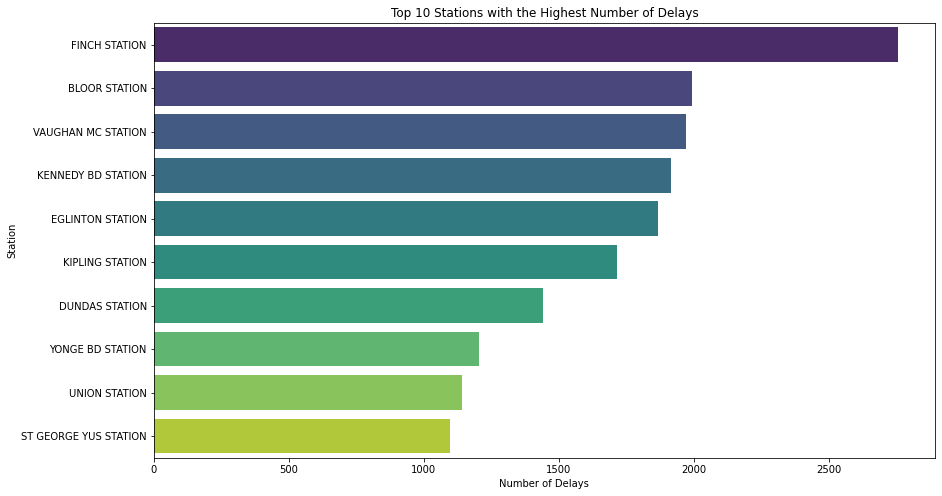

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'tcc_delay_3year' with the specified columns
# Replace 'tcc_delay_3year' with the actual name of your DataFrame

# Get the top 10 stations with the highest number of delays
top_10_stations = tcc_delay_3year['Station'].value_counts().head(10).reset_index(name='Delay Count')

# Plot the top 10 stations with delays using a horizontal bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Delay Count', y='index', data=top_10_stations, palette='viridis')
plt.title('Top 10 Stations with the Highest Number of Delays')
plt.xlabel('Number of Delays')
plt.ylabel('Station')
plt.show()


### Here are the top ten stations with the most amount of delays; the station with the most delay cases is Finch.

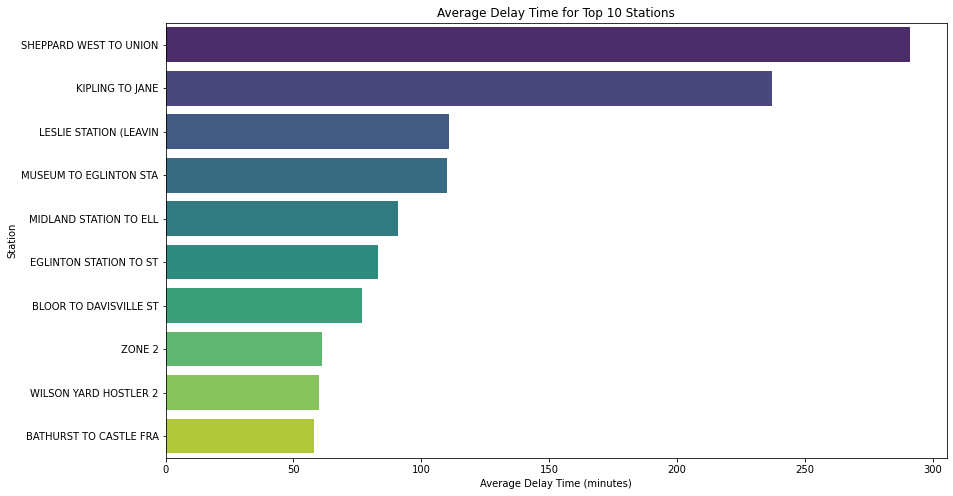

In [144]:
# Calculate average delay time for each station
average_delay_by_station = tcc_delay_3year.groupby('Station')['Min Delay'].mean().reset_index(name='Average Delay Time')

# Get the top 10 stations with the highest average delay time
top_10_stations = average_delay_by_station.nlargest(10, 'Average Delay Time')

# Plot the average delay time for the top 10 stations using a horizontal bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Average Delay Time', y='Station', data=top_10_stations, palette='viridis')
plt.title('Average Delay Time for Top 10 Stations')
plt.xlabel('Average Delay Time (minutes)')
plt.ylabel('Station')
plt.show()

### These are the top ten stations with the longest average delays, and the station with the longest average wait is SHEPPARD WEST TO UNION.

#### ***Can we predict them?
 
 Yes, Our research showed that the average delay time and the distribution of delays vary depending on a number of criteria, including the year, month, day of the week, stations, and lines.
For example, there's a good likelihood the tube will run late on Friday. 
Thus, an ML model that predicts delays can be created using these attributes.

#### ***Can we prevent them?

Indeed, according to the analysis, we now know the main causes of the delays as well as the leading stations and the reasons behind them specifically, so addressing those causes will aid in reducing the delays. 